In [90]:
from tensorflow.keras.models import load_model

# H5 파일에서 모델 로드
model = load_model('conv_net_v1.h5')


In [5]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 100, 32)        │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 100, 32)        │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 50, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 50, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 50, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 25, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 25, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 12, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,942 (890.40 KB)

 Trainable params: 227,940 (890.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [11]:
# 첫 번째 레이어의 가중치와 바이어스 가져오기
weights, biases = model.layers[4].get_weights()

# 가중치 및 바이어스 값 출력
print("Weights:", weights)
print("Biases:", biases)

print(min(weights))



Weights: [[[-0.06533009  0.01465055  0.04903515 ... -0.07030709 -0.10935934
    0.04529326]
  [-0.02066505  0.07512125  0.01408713 ...  0.09727408 -0.10406874
   -0.09369133]
  [-0.00220207  0.03903237 -0.09389728 ... -0.01721722  0.04956792
    0.11253052]
  ...
  [ 0.11987542 -0.01493703  0.03836576 ... -0.05149253  0.01662376
    0.03275509]
  [-0.09578639 -0.06427402  0.11012019 ...  0.0650133  -0.05571481
    0.10697383]
  [ 0.0709341   0.07440424  0.05867425 ...  0.02309787 -0.00191521
   -0.06890205]]

 [[-0.08294829 -0.05767635 -0.11378863 ... -0.12070255 -0.13351583
    0.09597548]
  [ 0.0888989  -0.07722258 -0.03345476 ... -0.04897784  0.05601501
   -0.02668821]
  [-0.0752914  -0.02434715  0.01128014 ...  0.06345661  0.1186678
    0.09951107]
  ...
  [ 0.11922347  0.08434505 -0.06219047 ...  0.15104212 -0.02406739
   -0.04439578]
  [-0.03735835  0.12801227 -0.05124204 ... -0.07896154 -0.03398873
   -0.08632689]
  [ 0.09843727  0.09037968  0.12423116 ...  0.13063376 -0.0086043

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [2]:
import pandas as pd

label_0 = pd.read_csv("data/label_0_data.csv")
label_1 = pd.read_csv("data/label_1b_data.csv")
label_2 = pd.read_csv("data/label_2_data.csv")
label_3 = pd.read_csv("data/label_3_data.csv")

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

def multiple_plotting():
    # 파일 경로, 이름 설정해주세요.
    data1_df = pd.read_csv('data/label_0_full.csv', header=None)
    data2_df = pd.read_csv('data/label_1_full.csv', header=None)
    data3_df = pd.read_csv('data/label_2_full.csv', header=None)
    data4_df = pd.read_csv('data/label_3_full.csv', header=None)

    data1_df.columns = ['x', 'y', 'z']
    data2_df.columns = ['x', 'y', 'z']
    data3_df.columns = ['x', 'y', 'z']
    data4_df.columns = ['x', 'y', 'z']


    vector_value1 = np.sqrt(data1_df['x']** 2 + data1_df['y']**2 + data1_df['z']**2)
    vector_value2 = np.sqrt(data2_df['x']** 2 + data2_df['y']**2 + data2_df['z']**2)
    vector_value3 = np.sqrt(data3_df['x']** 2 + data3_df['y']**2 + data3_df['z']**2)
    vector_value4 = np.sqrt(data4_df['x']** 2 + data4_df['y']**2 + data4_df['z']**2)

    plt.figure(figsize=(20,20))
    fig, axes = plt.subplots(nrows=2, ncols=2)

    axes[0][0].plot(vector_value1)
    axes[0][1].plot(vector_value2)
    axes[1][0].plot(vector_value3)
    axes[1][1].plot(vector_value4)
    plt.show()

<Figure size 2000x2000 with 0 Axes>

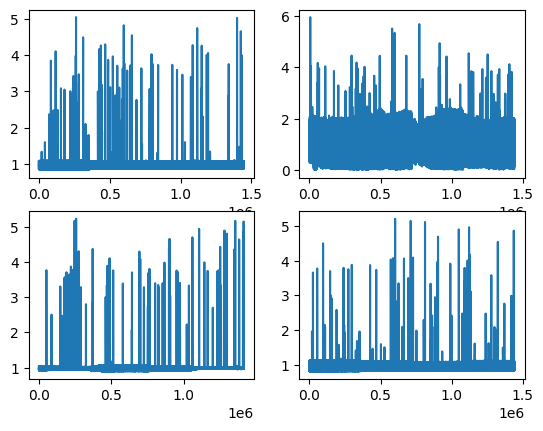

In [92]:
multiple_plotting()

In [5]:
len_0 = len(label_0)
len_1 = len(label_1)
len_2 = len(label_2)
len_3 = len(label_3)

label_X = [label_0, label_1, label_2, label_3]
rem = [len_0, len_1, len_2, len_3]

for i in range(4):
    r = rem[i] % 100
    label_X[i] = label_X[i].iloc[:rem[i] - r]

    print(len(label_X[i]))

data_split_0 = np.array_split(label_X[0], len(label_X[0]) // 100)
data_split_1 = np.array_split(label_X[1], len(label_X[1]) // 100)
data_split_2 = np.array_split(label_X[2], len(label_X[2]) // 100)
data_split_3 = np.array_split(label_X[3], len(label_X[3]) // 100)


y_label_0 = np.zeros(len(data_split_0))
y_label_1 = np.ones(len(data_split_1))
y_label_2 = np.full(len(data_split_2), 2)
y_label_3 = np.full(len(data_split_3), 3)

359900
359800
359900
359900


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
x_test = np.concatenate([data_split_0, data_split_1, data_split_2, data_split_3])
x_test

array([[[ 0.989293,  0.00706 ,  0.008017],
        [ 0.878125,  0.016363,  0.009689],
        [ 0.952647,  0.011712,  0.015421],
        ...,
        [ 1.033317,  0.010733,  0.008972],
        [ 1.035531,  0.008529,  0.006345],
        [ 0.959288,  0.014894,  0.00159 ]],

       [[ 0.970109,  0.010488,  0.006345],
        [ 1.019544,  0.008774,  0.011361],
        [ 1.003312,  0.011712,  0.001832],
        ...,
        [ 0.972077,  0.007795, -0.001557],
        [ 0.887963,  0.006815,  0.004912],
        [ 0.974044,  0.009998,  0.014943]],

       [[ 1.015855,  0.017588,  0.006345],
        [ 0.924363,  0.00755 ,  0.012555],
        [ 0.999623,  0.012446,  0.007301],
        ...,
        [ 1.003558,  0.008039,  0.012555],
        [ 1.003558,  0.008039,  0.012555],
        [ 1.00405 ,  0.007795,  0.006345]],

       ...,

       [[ 0.982407,  0.010243, -0.058443],
        [ 1.010198,  0.010977, -0.049244],
        [ 1.005525,  0.013915, -0.053843],
        ...,
        [ 0.823033,  0.013

In [ ]:
y_test_one_hot = to_categorical(y_test_concat, num_classes=4)

In [79]:
import pandas as pd

data = pd.read_csv("data/sensor_data_b.csv")
df = pd.DataFrame(data)

label_0 = df[df.iloc[:, -1] == 0]
label_1 = df[df.iloc[:, -1] == 1]
label_2 = df[df.iloc[:, -1] == 2]
label_3 = df[df.iloc[:, -1] == 3]
# label_1 = df[df['label'] == 1]
# label_2 = df[df['label'] == 2]
# label_3 = df[df['label'] == 3]

y_label_0 = label_0.iloc[:, -1]
x_label_0 = label_0.iloc[:, :-1]

y_label_1 = label_1.iloc[:, -1]
x_label_1 = label_1.iloc[:, :-1]

y_label_2 = label_2.iloc[:, -1]
x_label_2 = label_2.iloc[:, :-1]

print(label_0.shape)
# print(y_label_0.shape)
print(x_label_0.shape)
print(x_label_1.shape)
print(x_label_2.shape)


print("Label 0 Data:")
print(len(label_0))
print(len(label_1))
print(len(label_2))
print(len(label_3))


(15888, 4)
(15888, 3)
(2056, 3)
(2055, 3)
Label 0 Data:
15888
2056
2055
0


In [87]:
def split_data(data):
    num_full_chunks = len(data) // 100  
    split_data = np.array_split(data[:num_full_chunks * 100], num_full_chunks)
    return split_data

x_test_0 = split_data(x_label_0)
x_test_1 = split_data(x_label_1)
x_test_2 = split_data(x_label_2)

y_label_0 = np.zeros(len(x_test_0))
y_label_1 = np.ones(len(x_test_1))
y_label_2 = np.full(len(x_test_2), 2)

print(len(x_test_0), len(y_label_0))
print(len(x_test_1), len(y_label_1))
print(len(x_test_2), len(y_label_2))



print(len(x_test_0), len(x_test_0[0]), len(x_test_1), len(x_test_1[0]), len(x_test_2), len(x_test_2[0]))


158 158
20 20
20 20
158 100 20 100 20 100


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [89]:
x_test_concat = np.concatenate([x_test_0, x_test_1, x_test_2], axis=0)
y_test_concat = np.concatenate([y_label_0, y_label_1, y_label_2], axis=0)

x_test_concat.shape
# y_test_concat.shape
# x_test_0 = np.array(x_test_0)

(198, 100, 3)